In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN

In [3]:
data =pd.read_csv("C:\\Users\kimhongbum\PycharmProjects\Lotte_competition\data\pdde.csv", encoding = 'cp949')
data.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"], inplace =True)
pd.set_option("display.max_columns", 100)

C:\Users\kimhongbum\AppData\Local\Temp\ipykernel_11104\664471406.py:1: DtypeWarning: Columns (9,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv("C:\\Users\kimhongbum\PycharmProjects\Lotte_competition\data\pdde.csv", encoding = 'cp949')


In [4]:
def preprocess(df):
    #성별 남자 : 0, 여성 1
    #나이 : 20대 0 30대 1 40대 2 50대 3 60대 4 70대 5
    df.replace({'ma_fem_dv': {"남성": 0, "여성": 1},
                      'ages': {"20대": 0,"30대": 1, "40대": 2, "50대": 3, "60대": 4, "70대": 5 }},inplace=True)
    #날짜 split
    df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m%d')
    df['year'] = df['날짜'].apply(lambda x: x.year)
    df['month'] = df['날짜'].apply(lambda x: x.month)
    df['요일'] = df['날짜'].apply(lambda x: x.weekday())

    #일교차 생성
    df['일교차'] = df["최고기온(℃)"] - df["최저기온(℃)"]

    #공휴일 생성 요일은 월:0, 화:1
    tmp = []
    # 주말
    for i in range(len(df)):
        if df['요일'][i]==5 or df['요일'][i]==6: # 주말이면
            tmp.append(df['de_dt'][i])
    # 21년도 기준 공휴일 & 기념일 & 대체휴일
    공휴일 = ['2021-01-01','2021-02-11','2021-02-12', '2021-02-13','2021-02-14','2021-03-01','2021-03-14','2021-05-05','2021-05-08','2021-06-06',
             '2021-08-15','2021-08-16','2021-09-20','2021-09-21','2021-09-22','2021-10-03','2021-10-04','2021-10-09','2021-10-11','2021-12-24','2021-12-25']

    tmp.extend(공휴일)

    tmp = list(set(tmp)) #중복제거

    holiday_anniversary = []
    for i in range(len(df)):
        if df['de_dt'][i] in tmp:
            holiday_anniversary.append(1)
        else:
            holiday_anniversary.append(0)

    df['holiday_anniversary'] = holiday_anniversary
    return df

In [5]:
preprocess(data)

,cust,ma_fem_dv,ages,zon_hlv,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm,zon_mcls,날짜,강수량(mm),평균기온(℃),최저기온(℃),최고기온(℃),평균습도(%rh),최저습도(%rh),일조합(hr),일사합(MJ/m2),year,month,요일,일교차,holiday_anniversary
0,M430112881,1,3,Z17,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의,NaN,2021-01-01,0.2,-3.4,-9.3,1.6,69,18,6.3,8.82,2021,1,4,10.9,0
1,M646853852,1,2,Z13,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,Z13001,2021-01-01,0.2,-3.4,-9.3,1.6,69,18,6.3,8.82,2021,1,4,10.9,0
2,M430112881,1,3,Z17,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,NaN,2021-01-01,0.2,-3.4,-9.3,1.6,69,18,6.3,8.82,2021,1,4,10.9,0
3,M430112881,1,3,Z17,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,NaN,2021-01-01,0.2,-3.4,-9.3,1.6,69,18,6.3,8.82,2021,1,4,10.9,0
4,M430112881,1,3,Z17,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,NaN,2021-01-01,0.2,-3.4,-9.3,1.6,69,18,6.3,8.82,2021,1,4,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,0,2,Z10,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,2021-12-31,0.0,-3.9,-7.2,0.1,42,10,8.5,11.23,2021,12,4,7.3,0
4381739,M533286446,0,2,Z10,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,2021-12-31,0.0,-3.9,-7.2,0.1,42,10,8.5,11.23,2021,12,4,7.3,0
4381740,M533286446,0,2,Z10,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,2021-12-31,0.0,-3.9,-7.2,0.1,42,10,8.5,11.23,2021,12,4,7.3,0
4381741,M533286446,0,2,Z10,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,2021-12-31,0.0,-3.9,-7.2,0.1,42,10,8.5,11.23,2021,12,4,7.3,0


In [29]:
import seaborn as sns
import matplotlib

In [47]:
data.drop(columns = ["de_dt"], inplace = True)

In [48]:
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')

<function matplotlib.pyplot.show(close=None, block=None)>

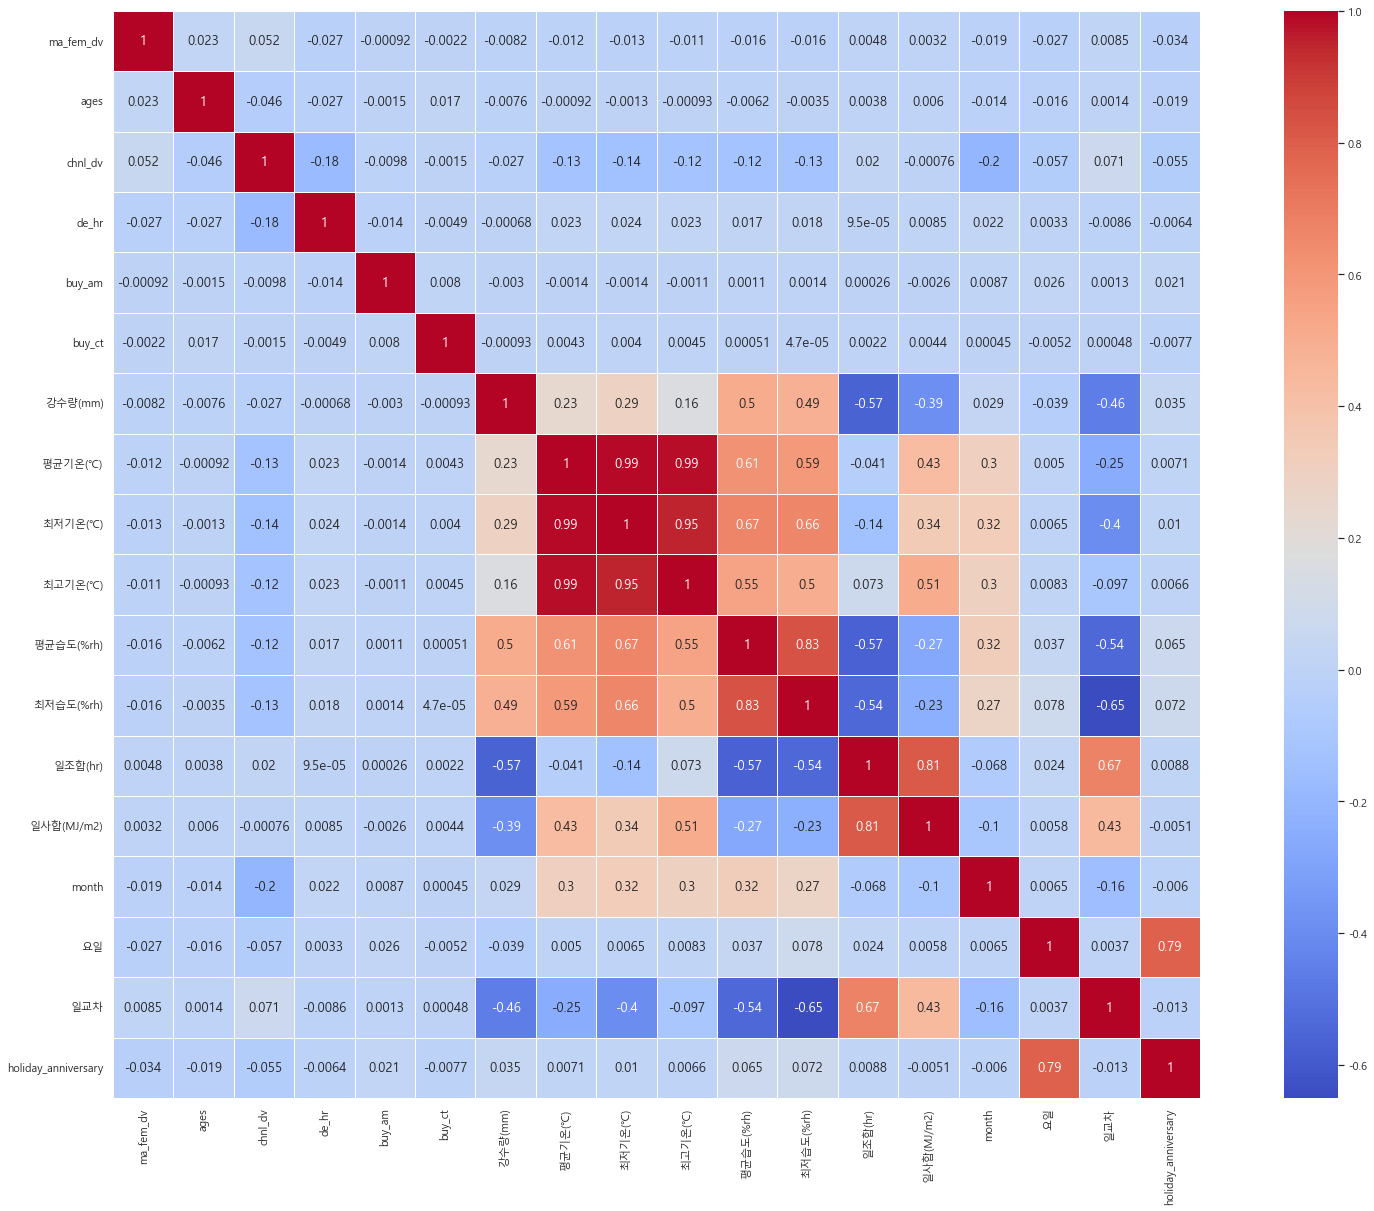

In [49]:
sns.set(font="Malgun Gothic",
    rc = {'figure.figsize':(30,20)})
sns.heatmap(data.corr(),annot=True, cmap = "coolwarm",
            linewidths = .5,
            square = True,
            annot_kws={"size": 13})
plt.show

In [16]:
le = LabelEncoder()
data['zon_hlv'] = le.fit_transform(data['zon_hlv'])
data['cop_c'] = le.fit_transform(data['cop_c'])
#data['clac_hlv_nm'] = le.fit_transform(data['clac_hlv_nm'])

In [17]:
data['br_c'].nunique()

6755

In [18]:
clu_data = data.drop(columns = ["cust", "rct_no",'pd_c', 'br_c', 'pd_nm','clac_mcls_nm','zon_mcls','날짜','de_dt', 'cop_c', 'zon_hlv', 'chnl_dv', 'year', 'clac_hlv_nm'])

In [19]:
clu_data.head(10)

,ma_fem_dv,ages,de_hr,buy_am,buy_ct,강수량(mm),평균기온(℃),최저기온(℃),최고기온(℃),평균습도(%rh),최저습도(%rh),일조합(hr),일사합(MJ/m2),month,요일,일교차,holiday_anniversary
0,1,3,10,15000.0,1,0.2,-3.4,-9.3,1.6,69,18,6.3,8.82,1,4,10.9,0
1,1,2,10,79700.0,1,0.2,-3.4,-9.3,1.6,69,18,6.3,8.82,1,4,10.9,0
2,1,3,10,19000.0,1,0.2,-3.4,-9.3,1.6,69,18,6.3,8.82,1,4,10.9,0
3,1,3,10,19000.0,1,0.2,-3.4,-9.3,1.6,69,18,6.3,8.82,1,4,10.9,0
4,1,3,10,19000.0,1,0.2,-3.4,-9.3,1.6,69,18,6.3,8.82,1,4,10.9,0
5,1,3,10,9900.0,1,0.2,-3.4,-9.3,1.6,69,18,6.3,8.82,1,4,10.9,0
6,1,3,11,10000.0,1,0.2,-3.4,-9.3,1.6,69,18,6.3,8.82,1,4,10.9,0
7,1,3,11,49000.0,1,0.2,-3.4,-9.3,1.6,69,18,6.3,8.82,1,4,10.9,0
8,1,3,11,310000.0,1,0.2,-3.4,-9.3,1.6,69,18,6.3,8.82,1,4,10.9,0
9,1,3,11,49500.0,1,0.2,-3.4,-9.3,1.6,69,18,6.3,8.82,1,4,10.9,0


# k-mean clustering

In [20]:
from sklearn.preprocessing import MinMaxScaler
# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(clu_data)

In [21]:
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
data['k_mean_cluster'] = model.fit_predict(data_scale)

In [22]:
data['k_mean_cluster'].value_counts()

1    2094729
2    1478612
0     808402
Name: k_mean_cluster, dtype: int64

In [23]:
pd.set_option('display.max_rows', None)
data.groupby('k_mean_cluster')['clac_hlv_nm'].value_counts()

k_mean_cluster  clac_hlv_nm
0               과자              83936
                채소              67509
                음료              61597
                대용식             60390
                유제품             53751
                냉장식품            49961
                과일              40160
                주류              40000
                축산물             32063
                테넌트/음식점         25899
                냉동식품            25106
                조리식품            23508
                조미료             22384
                담배              20285
                청소/세탁/욕실용품      20124
                수산물             13550
                문구/사무용품         12442
                세제/위생           10601
                주방잡화            10352
                남성의류             9518
                기타(비상품)          9400
                퍼스널케어            9010
                건해산물             8388
                패션잡화             7418
                스포츠패션            7208
                여성의류  

In [24]:
pd.set_option('display.max_columns', None)
data.groupby('k_mean_cluster').describe()

ma_fem_dv                                               \
                    count      mean       std  min  25%  50%  75%  max   
k_mean_cluster                                                           
0                808402.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
1               2094729.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
2               1478612.0  0.689092  0.462865  0.0  0.0  1.0  1.0  1.0   

                     ages                                               \
                    count      mean       std  min  25%  50%  75%  max   
k_mean_cluster                                                           
0                808402.0  1.998842  1.075611  0.0  1.0  2.0  3.0  5.0   
1               2094729.0  2.078620  1.064216  0.0  1.0  2.0  3.0  5.0   
2               1478612.0  2.013820  1.005749  0.0  1.0  2.0  3.0  5.0   

                  zon_hlv                                                   \
                    count       mean       std  min  25%   50%   75%   max   
k_mean_cluster                                                               
0                808402.0  11.122888  4.522843  0.0  9.0  10.0  16.0  16.0   
1               2094729.0  10.743558  4.562357  0.0  9.0  10.0  16.0  16.0   
2               1478612.0  10.783791  4.531894  0.0  9.0  10.0  16.0  16.0   

                  chnl_dv                                               \
                    count      mean       std  min  25%  50%  75%  max   
k_mean_cluster                                                           
0                808402.0  1.085393  0.279466  1.0  1.0  1.0  1.0  2.0   
1               2094729.0  1.118781  0.323530  1.0  1.0  1.0  1.0  2.0   
2               1478612.0  1.074838  0.263129  1.0  1.0  1.0  1.0  2.0   

                    cop_c                                               \
                    count      mean       std  min  25%  50%  75%  max   
k_mean_cluster                                                           
0                808402.0  1.500967  1.031650  0.0  1.0  1.0  2.0  5.0   
1               2094729.0  1.281061  0.918249  0.0  1.0  1.0  2.0  5.0   
2               1478612.0  1.117384  0.881290  0.0  1.0  1.0  1.0  5.0   

                    de_dt                                                    \
                    count          mean         std         min         25%   
k_mean_cluster                                                                
0                808402.0  2.021065e+07  340.378224  20210101.0  20210329.0   
1               2094729.0  2.021063e+07  341.667001  20210101.0  20210323.0   
2               1478612.0  2.021063e+07  340.777031  20210102.0  20210321.0   

                                                        de_hr             \
                       50%         75%         max      count       mean   
k_mean_cluster                                                             
0               20210622.0  20210920.0  20211231.0   808402.0  15.914587   
1               20210614.0  20210915.0  20211231.0  2094729.0  15.656042   
2               20210619.0  20210918.0  20211226.0  1478612.0  15.677803   

                                                          buy_am  \
                     std  min   25%   50%   75%   max      count   
k_mean_cluster                                                     
0               4.076876  0.0  13.0  17.0  19.0  23.0   808402.0   
1               3.726752  0.0  13.0  16.0  18.0  23.0  2094729.0   
2               3.501133  0.0  13.0  16.0  18.0  23.0  1478612.0   

                                                                            \
                        mean            std   min     25%     50%      75%   
k_mean_cluster                                                               
0               19876.904807  256839.652200  10.0  1980.0  3900.0   7990.0   
1               19665.870093  185354.194175   1.0  2000.0  3990.0   8980.0   
2               30060.743727  267762

In [25]:
data.to_csv("k_means_clustering_pdde(2).csv", encoding = "cp949", )

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

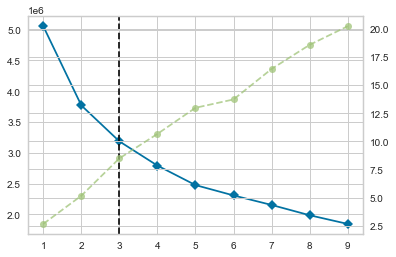

In [26]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)

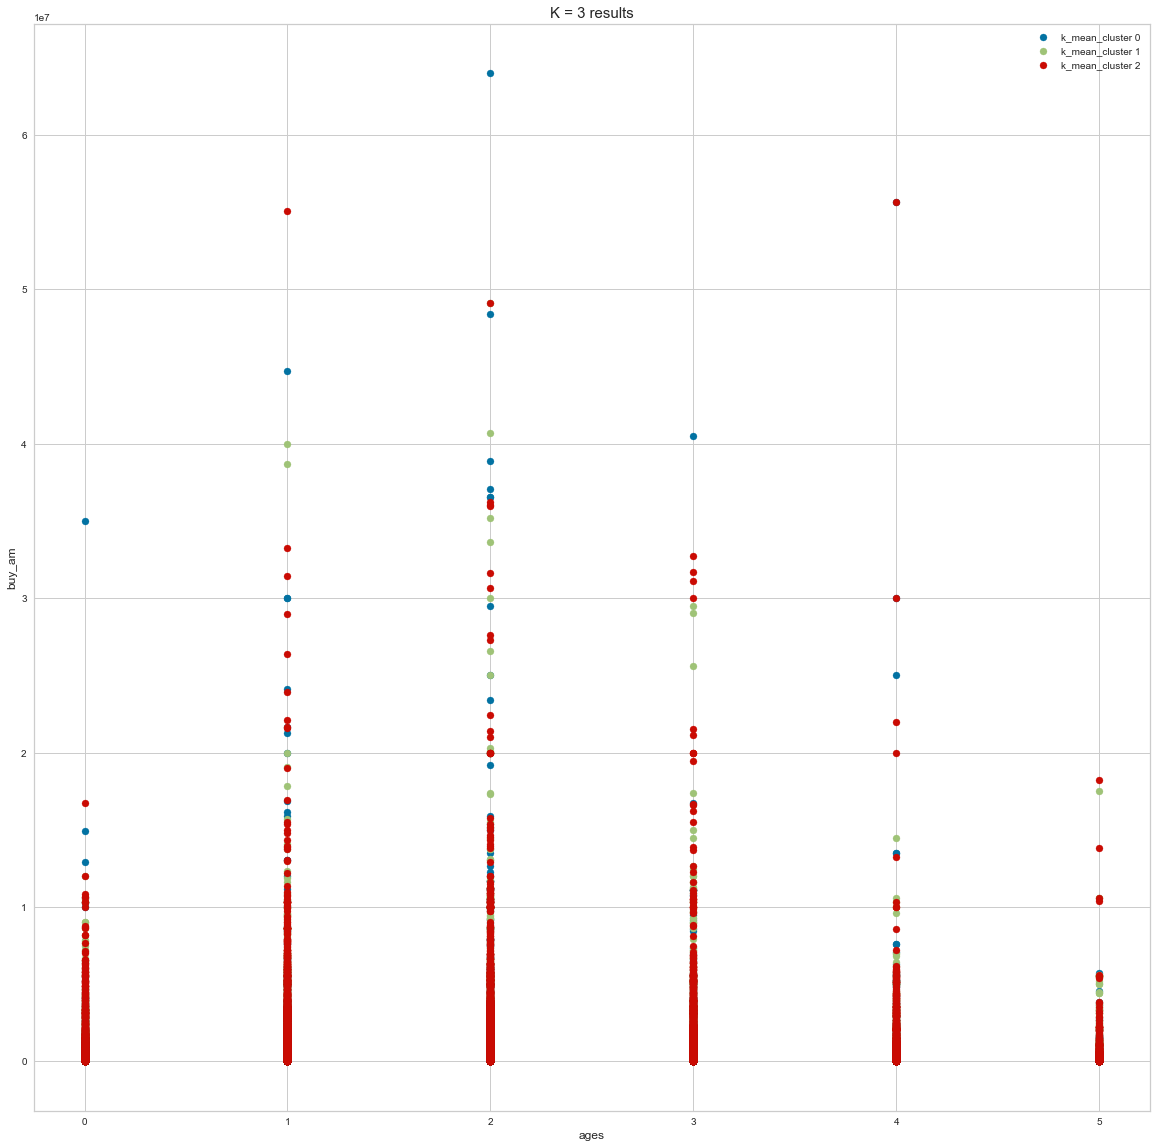

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 20))
k =3
for i in range(k):
    plt.scatter(data.loc[data['k_mean_cluster'] == i, 'ages'], data.loc[data['k_mean_cluster'] == i, 'buy_am'],
                label = 'k_mean_cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('ages', size = 12)
plt.ylabel('buy_am', size = 12)
plt.show()